In [15]:
import os, json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import albumentations as A

from config import *
from utils import *
from models import *

In [47]:
# Data 불러오기
train_df = pd.read_csv(TRAIN_DF_PATH)
test_df = pd.read_csv(TEST_DF_PATH)

train_dset = ObjDetectionDataset(TRAIN_PATH, train_df, TestTransform())
test_dset = ObjDetectionDataset(TEST_PATH, test_df, TestTransform())
print(f"Load Dataset from \n {TRAIN_DF_PATH} \n {TEST_DF_PATH}")
print(f"Train data size: {len(train_dset)}, Test data size: {len(test_dset)}")

iter_ = iter(train_dset)
next(iter_)
next(iter_)
next(iter_)
next(iter_)
image, label = next(iter_)

Load Dataset from 
 c:\Users\moooo\git\KDT_AI_MISSION\kdt_competition_3\data\train\train_output.csv 
 c:\Users\moooo\git\KDT_AI_MISSION\kdt_competition_3\data\test\test_output.csv
Train data size: 1204, Test data size: 300


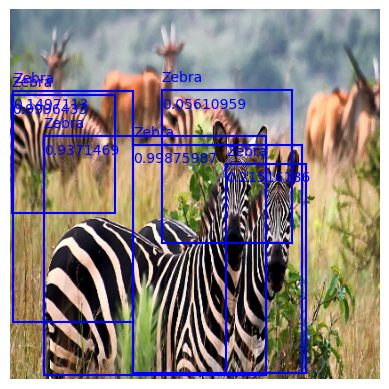

In [48]:
from pprint import pprint

model = torch.load('C:\\Users\\moooo\\Downloads\\test4-20230614T030959Z-001\\test4\\best_detector.pth', map_location=DEVICE)

cls, boxes, scores = get_prediction(model, image, 0)
image = image.cpu().permute(1, 2, 0).numpy()
plt.axis('off')
plt.imshow(image)

for pred_class, pred_box, pred_score in zip(cls, boxes, scores):
    # pred box color blue
    plt.plot([pred_box[0], pred_box[0]], [pred_box[1], pred_box[3]], c='b')
    plt.plot([pred_box[0], pred_box[2]], [pred_box[1], pred_box[1]], c='b')
    plt.plot([pred_box[0], pred_box[2]], [pred_box[3], pred_box[3]], c='b')
    plt.plot([pred_box[2], pred_box[2]], [pred_box[1], pred_box[3]], c='b')
    plt.text(pred_box[0], (pred_box[1] - 10), s=CLASS_INFO[pred_class], c='b')
    plt.text(pred_box[0], (pred_box[1] + 20), s=pred_score, c='b')



In [43]:
## Transforms visualize

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

plt.rcParams['savefig.bbox'] = 'tight'
orig_img = image.cpu().permute(1, 2, 0).numpy()

def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(15, 15))
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    
    if with_orig:
        axs[0, 0].set(title="original image")
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_cols):
            axs[0, row_idx + 1].set(title=row_title[row_idx])
            axs[0, row_idx + 1].title.set_size(8)

    plt.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

IndexError: index 6 is out of bounds for axis 1 with size 6

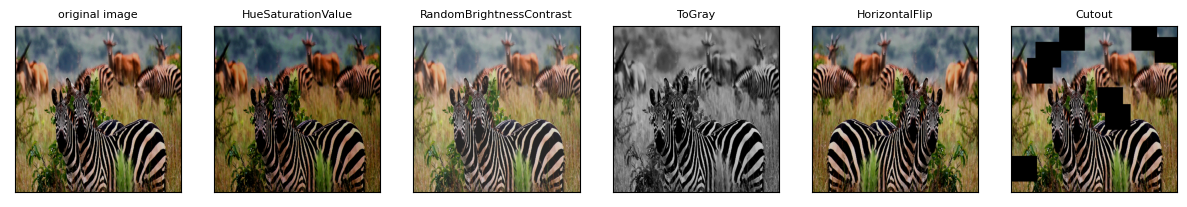

In [58]:
## visualize image
# orig_img = 'train/dog/pic_001.jpg'

class Transformer1:
    def __init__(self):
        self.transforms = A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit= 0.2, val_shift_limit=0.2, p=1)

    def __call__(self, **kwargs):
        return self.transforms(**kwargs)['image']
    
class Transformer2:
    def __init__(self):
        self.transforms = A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1)

    def __call__(self, **kwargs):
        return self.transforms(**kwargs)['image']
    
class Transformer3:
    def __init__(self):
        self.transforms = A.ToGray(p=1)

    def __call__(self, **kwargs):
        return self.transforms(**kwargs)['image']
    
class Transformer4:
    def __init__(self):
        self.transforms = A.HorizontalFlip(p=1)

    def __call__(self, **kwargs):
        return self.transforms(**kwargs)['image']
    
class Transformer5:
    def __init__(self):
        self.transforms = A.Cutout(num_holes=8, max_h_size=64, max_w_size=64, fill_value=0, p=1)

    def __call__(self, **kwargs):
        return self.transforms(**kwargs)['image']
    

transformed_imgs = [
    Transformer1()(image=orig_img), 
    Transformer2()(image=orig_img),
    Transformer3()(image=orig_img),
    Transformer4()(image=orig_img),
    Transformer5()(image=orig_img),
]
plot(transformed_imgs, row_title=[
    "HueSaturationValue",
    "RandomBrightnessContrast",
    "ToGray",
    "HorizontalFlip",
    "Cutout"
])